# Spark on EMR

In [1]:
from pyspark.sql import SparkSession, SQLContext
from pyspark.conf import SparkConf
spark = SparkSession.builder.getOrCreate()

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1636914596883_0003,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
from pyspark.sql.functions import udf, col, asc,desc, sum, rank
from pyspark.sql.types import TimestampType, DateType
from pyspark.sql.window import Window
from time import time

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
sc.install_pypi_package("pandas==0.25.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


You are using pip version 9.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [4]:
sc.install_pypi_package("kiwisolver==1.2.0")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


You are using pip version 9.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [5]:
sc.install_pypi_package("matplotlib==3.1.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


You are using pip version 9.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [6]:
sc.install_pypi_package("chart_studio")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Running setup.py bdist_wheel for retrying: started
  Running setup.py bdist_wheel for retrying: finished with status 'done'
  Stored in directory: /var/lib/livy/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying

You are using pip version 9.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [7]:
sc.install_pypi_package("iso3166")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


You are using pip version 9.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

# LABORATORY 3

In [8]:
smog_df = spark.read.json("s3a://openaq-fetches/realtime/2021-10-0[1-7]/*")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
smog_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+---------------+-----+--------------------+-------+--------------------+--------------------+------+---------+--------------+----------+-----+-----+
|         attribution|averagingPeriod| city|         coordinates|country|                date|            location|mobile|parameter|    sourceName|sourceType| unit|value|
+--------------------+---------------+-----+--------------------+-------+--------------------+--------------------+------+---------+--------------+----------+-----+-----+
|[{EPA AirNow DOS,...|   {hours, 1.0}|Dubai|{25.25848, 55.309...|     AE|{2021-10-02T00:00...|US Diplomatic Pos...| false|     pm25|StateAir_Dubai|government|µg/m³| 30.0|
|[{EPA AirNow DOS,...|   {hours, 1.0}|Dubai|{25.25848, 55.309...|     AE|{2021-10-02T01:00...|US Diplomatic Pos...| false|     pm25|StateAir_Dubai|government|µg/m³| 35.0|
|[{EPA AirNow DOS,...|   {hours, 1.0}|Dubai|{25.25848, 55.309...|     AE|{2021-10-02T02:00...|US Diplomatic Pos...| false|     pm25|StateAir_Duba

# Task 1
Znajdź miasta w Polsce, w których średnie stężenie pyłu “pm10” było niższe niż maksymalne stężenie w Berlinie (w całym badanym okresie). Obliczenia wykonaj dla danych z kilku dni. Wyniki posortuj malejąco po stężeniu pm10.

In [10]:
smog_pl = smog_df.filter((smog_df.country == 'PL') & (smog_df.parameter == 'pm10'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [11]:
smog_pl.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+---------------+--------------------+--------------------+-------+--------------------+--------------------+------+---------+----------+----------+-----+-------+
|attribution|averagingPeriod|                city|         coordinates|country|                date|            location|mobile|parameter|sourceName|sourceType| unit|  value|
+-----------+---------------+--------------------+--------------------+-------+--------------------+--------------------+------+---------+----------+----------+-----+-------+
|       null|           null|                Łódź|{51.775411, 19.4509}|     PL|{2021-10-06T20:00...|     Łódź-Gdańska 16| false|     pm10|      GIOS|government|µg/m³|   35.3|
|       null|           null|                Łódź|{51.775411, 19.4509}|     PL|{2021-10-06T19:00...|     Łódź-Gdańska 16| false|     pm10|      GIOS|government|µg/m³|   29.2|
|       null|           null|               Gajew|{52.14325, 19.233...|     PL|{2021-10-06T20:00...|               Gajew| fal

In [12]:
smog_berlin = smog_df.filter((smog_df.city == 'Berlin') & (smog_df.parameter == 'pm10'))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
smog_berlin.groupBy(smog_berlin.city).max('value').collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(city='Berlin', max(value)=32.74)]

In [14]:
max_berlin = 32.74

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
smog_pl_avg = smog_pl.select('city', 'date', 'value').groupBy('city').avg('value')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
smog_pl_avg.filter(smog_pl_avg['avg(value)'] < max_berlin).sort(col('avg(value)').desc()).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------------+------------------+
|            city|        avg(value)|
+----------------+------------------+
|     Częstochowa| 32.46693286163523|
|        Żyrardów|32.392138364779875|
|          Nowiny| 32.38255186721992|
|         Gliwice| 32.09903125786163|
|        Oświęcim|31.844503191489363|
|  Janów Lubelski|31.720374220374225|
|  Biała Podlaska|31.658413361169103|
|          Rybnik|31.362819612244895|
|       Zabierzów| 31.35198816455696|
|          Olesno|31.296278556263267|
|Wodzisław Śląski|31.261712919254663|
|       Szamotuły|31.227579253112033|
| Sucha Beskidzka|30.755458076923077|
|          Gołdap|30.748286554621846|
|       Nowa Ruda|30.595053229813672|
|            Łask| 30.45741127348642|
|         Pleszew| 30.40293004587156|
|           Gajew|30.386313465783665|
|          Sierpc|30.029584199584203|
|          Poznań| 29.92320072478991|
+----------------+------------------+
only showing top 20 rows

# Task 2

Dla danych z wybranych kilku dni przedstaw w ujęciu godzinowym (wybierz czas UTC) najwyższe zanotowane stężenie pm25 w poszczególnych miastach z całego zbioru danych. Wyniki posortuj po rosnąco datach.

Moja interpretacja - dla danych miast sprawdzam w tym okresie w których datach(z godzinami) było najwyższe stężenie

In [17]:
from datetime import datetime
from dateutil import parser

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
def parse_datetime(date):
    parsed = parser.isoparse(date["utc"])
    return parsed.replace(minute=0, second=0)

datetime_udf = udf(parse_datetime, TimestampType())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
def get_n_max_measures_for_city(city, n):
    return (smog_df.filter((smog_df.city == city) & (smog_df.parameter == 'pm25'))
        .withColumn('datetime', datetime_udf('date'))
        .groupBy('datetime')
        .max('value')
        .orderBy(col('max(value)').desc())
        .limit(n)
        .orderBy('datetime')
    )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
get_n_max_measures_for_city('Lublin', 10).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+----------+
|           datetime|max(value)|
+-------------------+----------+
|2021-10-01 23:00:00|      30.9|
|2021-10-02 00:00:00|      31.8|
|2021-10-02 01:00:00|      30.5|
|2021-10-02 02:00:00|      37.0|
|2021-10-02 03:00:00|      34.0|
|2021-10-02 18:00:00|      38.3|
|2021-10-02 19:00:00|      40.2|
|2021-10-02 20:00:00|      32.9|
|2021-10-02 21:00:00|      29.9|
|2021-10-03 03:00:00|      31.3|
+-------------------+----------+

# Task 3
znajdź ranking miast pod względem średniego zanieczyszczenia liczonego dla N najwyższych pomiarów pod względem “pm25” dla danych z kilku dni. Rozważ jedynie miasta, których nazwy składają się z małych i dużych liter alfabetu łacińskiego.

In [21]:
def get_n_means_pollution(n):
    window = Window.partitionBy('city').orderBy('value')
    
    smog_df_sorted = (
        smog_df.filter((smog_df.city.rlike('^[a-zA-Z]+$')) & (smog_df.parameter == 'pm25'))
            .withColumn('rank', rank().over(window))
    )
    
    return (
        smog_df_sorted.select('city', 'value')
            .filter(smog_df_sorted.rank <= n)
            .groupBy('city')
            .avg('value')
            .orderBy(col('avg(value)').desc())
    )

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [22]:
get_n_means_pollution(5).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+------------------+
|        city|        avg(value)|
+------------+------------------+
|     Kampala|              22.0|
|      Dharan|              20.0|
|    Dushanbe|              19.0|
|   Prishtine|18.164000000000314|
|    Shenyang|              17.0|
|     Prizren|15.736000000000308|
|   Mitrovice| 14.92499999999977|
|       Delhi|              14.0|
|    Tashkent|              14.0|
|      Drenas|  13.1479999999998|
|      Mielec|          13.14478|
|Chachoengsao|              13.0|
|      Gjilan|12.557000000000109|
|      Mumbai|              11.0|
|    Songkhla|              11.0|
|      Phuket|              11.0|
|        Peje|10.680999999999939|
|       Utena|             10.11|
|   Uttaradit|              10.0|
|       Satun|              10.0|
+------------+------------------+
only showing top 20 rows

In [23]:
get_n_means_pollution(10).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------+------------------+
|        city|        avg(value)|
+------------+------------------+
|     Kampala|              22.0|
|      Dharan|              20.0|
|    Dushanbe|              19.0|
|   Prishtine|18.164000000000314|
|    Shenyang|              17.0|
|     Prizren|15.736000000000308|
|   Mitrovice| 14.92499999999977|
|      Mielec|14.055169999999999|
|       Delhi|              14.0|
|    Tashkent|              14.0|
|      Drenas|  13.1479999999998|
|Chachoengsao|              13.0|
|      Gjilan|12.557000000000109|
|      Phuket|              11.0|
|      Mumbai|              11.0|
|    Songkhla|              11.0|
|        Peje|10.680999999999939|
|       Utena|             10.11|
|    Saraburi|              10.0|
|       Dubai|              10.0|
+------------+------------------+
only showing top 20 rows

# Task 4
Zwizualizuj na mapie średnie zanieczyszczenie w danym kraju dla wybranych kilku dni względem czasu (mapa + slider czasu albo zbiór klatek i animacja) dla wybranych państw.

In [24]:
def parse_date(date):
    parsed = parser.isoparse(date["utc"])
    return parsed.date()

date_udf = udf(parse_date, DateType())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
def get_country_heatmap(country):
    df = smog_df.filter((smog_df.parameter == 'pm25') & (smog_df.country == country)).select('coordinates', 'value', 'date').withColumn('date', date_udf('date'))
    return df.groupBy('coordinates', 'date').avg('value').orderBy('date', 'coordinates').select('date', df.coordinates['latitude'], df.coordinates['longitude'], 'avg(value)')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
%%spark -o pdf

pdf = get_country_heatmap('PL')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
pdf.orderBy(col('avg(value)').desc()).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+--------------------+---------------------+------------------+
|      date|coordinates.latitude|coordinates.longitude|        avg(value)|
+----------+--------------------+---------------------+------------------+
|2021-09-30|            49.93785|            18.975594|           79.8635|
|2021-09-30|           50.878998|            20.633692|             58.72|
|2021-09-30|           51.067439|            19.448694|              58.0|
|2021-09-30|           51.856692|            19.421231|              54.0|
|2021-09-30|           52.188474|            21.176233|             51.12|
|2021-09-30|           52.658467|            19.059314|              42.1|
|2021-10-05|           51.748103|             18.04931|  37.8006882352941|
|2021-10-07|           51.748103|             18.04931| 37.60959411764706|
|2021-09-30|           51.399084|            21.147474|             37.25|
|2021-09-30|           50.849509|            17.462579|           37.2008|
|2021-09-30|           51

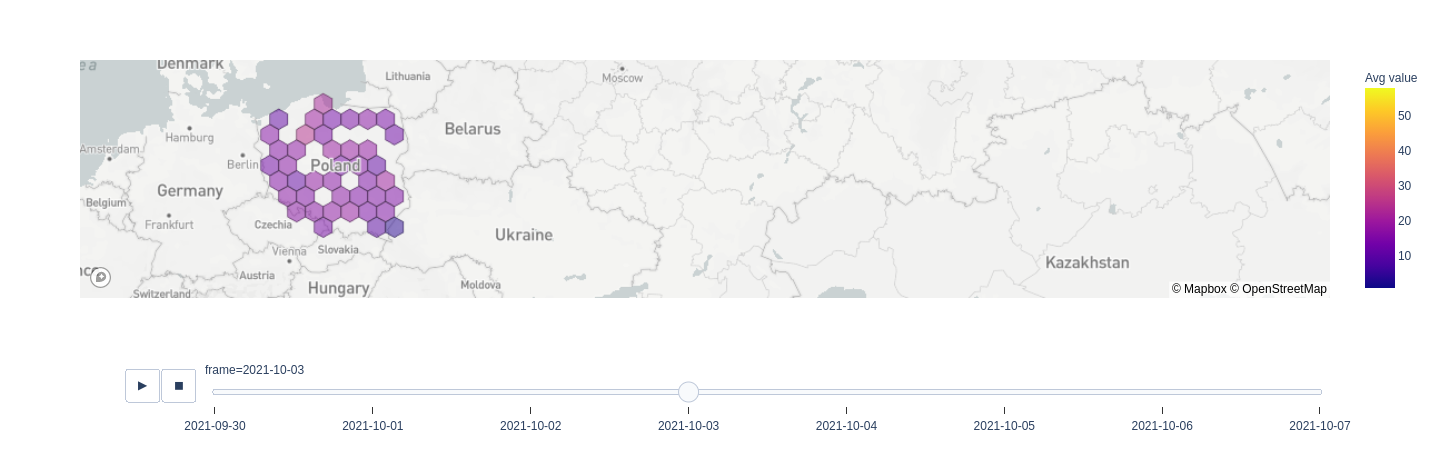

In [56]:
%%local

from datetime import datetime
import pandas as pd



import plotly.figure_factory as ff
import plotly.express as px
import numpy as np

px.set_mapbox_access_token("pk.eyJ1Ijoib3Jlb3JlIiwiYSI6ImNrdndwNm13aTBhZzYyb2xjcng4dGdnNWEifQ.LADFJcYpNwTupseSVwA72g")
pdf = pdf.astype({"date": str})

fig = ff.create_hexbin_mapbox(
    data_frame=pdf, lat='coordinates.latitude', lon='coordinates.longitude',
    nx_hexagon=8, opacity=0.5, color="avg(value)", labels={"color": "Avg value"}, min_count=1, animation_frame="date", agg_func=np.mean
)

fig.show()

# Task 5
Korzystanie z klastra dla dużych danych
Proszę wykonać zadanie 1 dla danych z całego miesiąca. 
- Zmierzyć czas wykonania
- Zwiększyć klaster do 2, 3, 4, 5, 6, 7 instancji workerów i zmierzyć czasy wykonania
- Narysować wykresy czasu, przyspieszenia i efektywności (time, speedup, efficiency)

In [8]:
smog_df = spark.read.json("s3a://openaq-fetches/realtime/2021-10-*/*")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
start = time()
smog_pl = smog_df.filter((smog_df.country == 'PL') & (smog_df.parameter == 'pm10'))
smog_berlin = smog_df.filter((smog_df.city == 'Berlin') & (smog_df.parameter == 'pm10'))
max_berlin = smog_berlin.groupBy(smog_berlin.city).max('value').collect()[0][1]
smog_pl_avg = smog_pl.select('city', 'date', 'value').groupBy('city').avg('value')
smog_pl_avg.filter(smog_pl_avg['avg(value)'] < max_berlin).sort(col('avg(value)').desc()).show()
end = time()
print('Time', end - start)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------+------------------+
|              city|        avg(value)|
+------------------+------------------+
|    Janów Lubelski|46.644283574638045|
|         Nowa Ruda| 44.84173687306501|
|   Sucha Beskidzka| 42.94864790095667|
|         Grudziądz| 42.80492385786801|
|         Zawiercie| 40.71934563636363|
|         Zabierzów| 39.94396703196347|
|         Nowy Targ| 39.35154604511278|
|         Pabianice| 38.81681681681682|
|            Mielec| 38.42624112654321|
|            Kraków| 38.33584728271405|
|Goczałkowice-Zdrój| 38.04559526925013|
|          Oświęcim| 37.63155793570219|
|            Zabrze| 37.52493958966566|
|  Wodzisław Śląski| 36.58313570776256|
|          Jarosław| 36.41996897474748|
|      Zdzieszowice| 36.30038829664571|
|          Radomsko| 36.21646178514163|
|            Zgierz|36.205673758865245|
|            Rybnik| 35.93036898406374|
|            Mosina|35.912208818818826|
+------------------+------------------+
only showing top 20 rows

Time 88.829098

In [11]:
workers = [2, 3, 4, 5, 6, 7]
times = [321.6, 279.5, 188.9, 134.9, 119.81, 88.8]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [13]:
speedups = [times[0] / time for time in times]
efficiencies = [speedup / worker for speedup, worker in zip(speedups, workers)]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

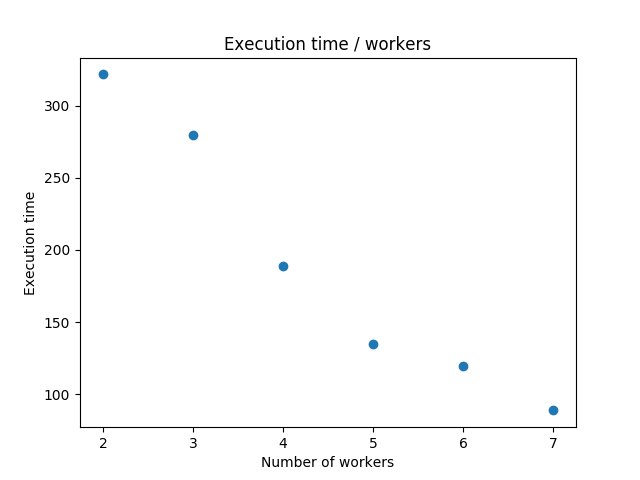

In [15]:
import matplotlib.pyplot as plt
plt.scatter(workers, times)
plt.xlabel("Number of workers")
plt.ylabel("Execution time")
plt.title("Execution time / workers")
plt.show()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

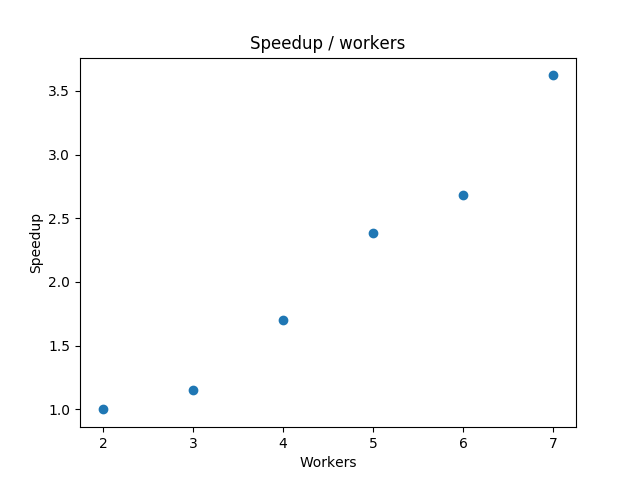

In [16]:
plt.clf()
plt.scatter(workers, speedups)
plt.xlabel("Workers")
plt.ylabel("Speedup")
plt.title("Speedup / workers")
plt.show()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

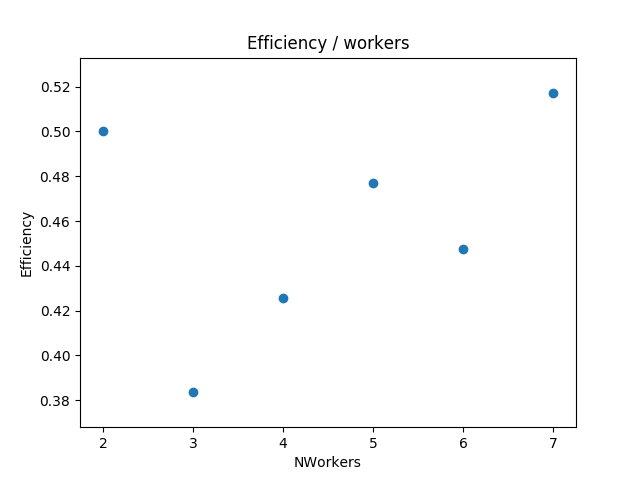

In [17]:
plt.clf()
plt.scatter(workers, efficiencies)
plt.xlabel("NWorkers")
plt.ylabel("Efficiency")
plt.title("Efficiency / workers")
plt.show()
%matplot plt

# Task 6
Proszę wykonać przykładowe zapytanie dla danych z całego roku 2020. Załączyć wybrane wykresy ze Spark UI (https://spark.apache.org/docs/latest/web-ui.html), np. DAG, diagram Gantta, informacje o rozmiarach danych.

In [8]:
smog_df = spark.read.json("s3a://openaq-fetches/realtime/2020-*-*/*")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
smog_df.filter((smog_df.country == 'PL') & (smog_df.parameter == 'pm10')).collect()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
Invalid status code '400' from http://localhost:8998/sessions/0/statements/9 with error payload: {"msg":"requirement failed: Session isn't active."}


!['image'](1.png "Title")

!['image'](2.png "Title")

!['image'](3.png "Title")